### Constants and Imports


In [17]:
import pandas as pd
import numpy as np
R=98
r=8

#### Question1


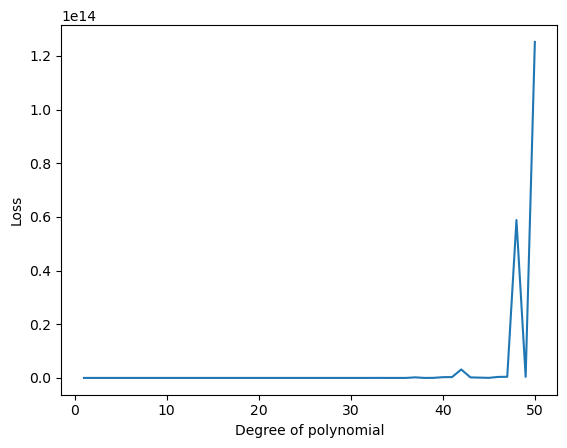

Minimum loss for degree 25: 37570585.45667867



In [18]:
import matplotlib.pyplot as plt
class solution:
  def __init__( self) :
    pass
  def fit_polynomial( self , x , y , p ) :
    x = x.astype(np.float64) 
    n = len(x)
    A = np.ones((len(x) , 1 ) )
    for i in range( 1 , p + 1 ) :
      A = np.column_stack((A , x**i ))
    A_t_A = np.dot(A.T , A )
    A_t = A.T
    y_t = y.T
    A_t_dot_y_t = np.dot(A.T,y.T)
    beta = np.dot( np.linalg.inv(A_t_A) , A_t_dot_y_t)
    beta = beta.reshape(1 , -1 )[0]
    return beta
  def get_loss(self , y_pred , y ) :
    sum = 0
    for i in range(len(y)) :
      sum += (y_pred[i] - y[i])**2
    sum = sum/2
    return sum
  def get_prediction( self , x , y , i ) :
    return np.dot(beta , np.vander( x , i +1 , increasing = True).T)
  

data = pd.read_excel('regr.xlsx')
data.at[0, 'rating'] = R / 10
B = data.values
x,y = B[:,0], B[:,1]

l = []
for i in range(1,51):
    soln = solution()
    beta = soln.fit_polynomial(x,y,i)
    y_pred = soln.get_prediction( x, y , i  )
    loss = soln.get_loss( y_pred , y )
    # print("Loss for degree " , i , "is" , loss)
    l.append(loss)

plt.plot(range(1,51),l)
plt.xlabel('Degree of polynomial')
plt.ylabel('Loss')
plt.show()

min_loss_degree = np.argmin(l) + 1
print(f'Minimum loss for degree {min_loss_degree}: {l[min_loss_degree - 1]}')
print()


### Question2


In [19]:
df = pd.read_csv('./training_dataSUB.csv')
X = df.iloc[:, :2].values   
Y = df.iloc[:,2].values
X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
v1 = 10.25 * R
v2 = R + 10
X_new = np.array([1, v1, v2])
predicted_result = X_new @ theta

print(f"Predicted Result for (Value1=10.25R, Value2=R+10): {predicted_result}")

Predicted Result for (Value1=10.25R, Value2=R+10): 896.5000000000018


### Question3


In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = sigmoid(X @ theta)
    cost = - (1/m) * np.sum(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)
    for _ in range(iterations):
        predictions = sigmoid(X @ theta)
        gradients = (1/m) * X.T @ (predictions - Y)
        theta -= alpha * gradients
    return theta

In [21]:
df=pd.read_excel('./Wine_Dataset.xlsx')
X=df.iloc[:, :12].values
Y=df.iloc[:,12].values
X = np.hstack((np.ones((X.shape[0], 1)), X))

theta = np.zeros(X.shape[1])
alpha = 0.01  
iterations = 1000  

theta = gradient_descent(X, Y, theta, alpha, iterations)

def predict(X, theta):
    predictions = sigmoid(X @ theta)
    return np.round(predictions)

input_data = np.array([12.52, 2.43, 2.17, 21, 88, 2.55, 2.27, 0.26, 1.22, 2, 0.9, R / 10])
input_data = np.hstack((np.ones(1), input_data))  

predicted_class = predict(input_data.reshape(1, -1), theta)
print(f"Predicted Alcohol Class: {int(predicted_class[0])}")

Predicted Alcohol Class: 1


#### Question4


In [22]:
df=pd.read_excel("./train.xlsx")
# print(df)
X = df.iloc[:, :11].values   
Y = df.iloc[:,11].values
# print(X)
# print(Y)
X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
input_data = np.array([15, 502932, 874387, r + 5, 51547, 2, 1, 9, 146, 60, 107])
input_data = np.hstack((np.ones(1), input_data))  
predicted_price = input_data @ theta
print(f"Predicted Price: {predicted_price}")


Predicted Price: 455125.3693458969


#### Question 5


In [23]:
df=pd.read_excel("./Mastercard_stock_history.xlsx")
# print(df)
X = df.iloc[:, :4].values   
Y = df.iloc[:,4].values
# print(X)
# print(Y)
X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
input_data = np.array([4+r/10, 4.228054432, 4.074560744,4.212239742])
input_data = np.hstack((np.ones(1), input_data))  
predicted_volume = input_data @ theta
print(f"Predicted Volume: {predicted_volume}")


Predicted Volume: 18837985.034122515


#### Question 6


#### Question 7


#### Implementation

##### deaths/10 = log(cases/100 \* x+y)

##### z=death/10

##### c=cases/100

##### z=log(cx+y)

##### exp(z)=cx+y

##### log_exp= C\*x + y


In [24]:
df=pd.read_csv("./covid.csv")
# print(df)
# print(df.isnull().sum())

mean_value_death =round(df['Deaths '].mean())
mean_value_cases=round(df['Cases '].mean())
# print(mean_value_death)
# print(mean_value_cases)

df['Deaths '].fillna(mean_value_death,inplace=True)
df['Cases '].fillna(mean_value_cases,inplace=True)
# print(df.isnull().sum())
# print(np.isfinite(df).all())
X = df.iloc[:,0].values   
Y = df.iloc[:,1].values
# # print(X)
# # print(Y)
C = X / 100
log_exp = np.exp(Y / 10)

A = np.vstack((C, np.ones(len(C)))).T
x, y = np.linalg.lstsq(A, log_exp, rcond=None)[0]
cases_india = 3264
C_india = cases_india / 100

predicted_log_exp_india = C_india * x + y
predicted_deaths_india = np.log(predicted_log_exp_india) * 10

print(f"Predicted Deaths for India: {predicted_deaths_india}")

Predicted Deaths for India: 618.2825172505396


C:\Users\HP\AppData\Local\Temp\ipykernel_22884\1882707615.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths '].fillna(mean_value_death,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22884\1882707615.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

#### Question 8